In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# pobranie bazy danych
# dokładny opis kolumn (ich znaczenie) znajduję się w dołączonym pliku xlsx

df = pd.read_csv(r"C:\Users\marci\Documents\marketing.csv",sep=';')

In [5]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumWebVisitsMonth,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04.09.2012,58,635,88,546,172,88,88,8,7,0
1,2174,1954,Graduation,Single,46344.0,1,1,08.03.2014,38,11,1,6,2,1,6,1,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,49,127,111,21,42,8,4,0
3,6182,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,4,20,10,3,5,2,6,0
4,5324,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,43,118,46,27,15,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13.06.2013,46,709,43,182,42,118,247,9,5,0
2236,4001,1946,PhD,Together,64014.0,2,1,10.06.2014,56,406,0,30,0,0,8,8,7,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25.01.2014,91,908,48,217,32,12,24,2,6,0
2238,8235,1956,Master,Together,69245.0,0,1,24.01.2014,8,428,30,214,80,30,61,6,3,0


In [44]:
# Ustawienie opcji pokazywania całej tabeli

pd.set_option('display.max_rows',None)

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumWebVisitsMonth,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04.09.2012,58,635,88,546,172,88,88,8,7,0
1,2174,1954,Graduation,Single,46344.0,1,1,08.03.2014,38,11,1,6,2,1,6,1,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,49,127,111,21,42,8,4,0
3,6182,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,4,20,10,3,5,2,6,0
4,5324,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,43,118,46,27,15,5,5,0


In [4]:
# sprawdzenie czy zbiór danych posiada jakieś puste pola ( wartości NULL)
# Wyświetlenie procentowego udziału pustych pól dla każdej z kolumn

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ID - 0%
Year_Birth - 0%
Education - 0%
Marital_Status - 0%
Income - 1%
Kidhome - 0%
Teenhome - 0%
Dt_Customer - 0%
Recency - 0%
MntWines - 0%
MntFruits - 0%
MntMeatProducts - 0%
MntFishProducts - 0%
MntSweetProducts - 0%
MntGoldProds - 0%
NumWebPurchases - 0%
NumWebVisitsMonth - 0%
Complain - 0%


In [5]:
# Usunięcie rekordów które posiadają puste pola

df=df.dropna()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumWebVisitsMonth,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04.09.2012,58,635,88,546,172,88,88,8,7,0
1,2174,1954,Graduation,Single,46344.0,1,1,08.03.2014,38,11,1,6,2,1,6,1,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,49,127,111,21,42,8,4,0
3,6182,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,4,20,10,3,5,2,6,0
4,5324,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,43,118,46,27,15,5,5,0


In [6]:
# typy danych dla każdej kolumny w analizowanych zbiorze danych

df.dtypes

ID                     int64
Year_Birth             int64
Education             object
Marital_Status        object
Income               float64
Kidhome                int64
Teenhome               int64
Dt_Customer           object
Recency                int64
MntWines               int64
MntFruits              int64
MntMeatProducts        int64
MntFishProducts        int64
MntSweetProducts       int64
MntGoldProds           int64
NumWebPurchases        int64
NumWebVisitsMonth      int64
Complain               int64
dtype: object

In [7]:
# zmiana typu danych w kolumnie Dt_Customer

df.astype({'Dt_Customer': 'datetime64[ns]'})
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumWebVisitsMonth,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04.09.2012,58,635,88,546,172,88,88,8,7,0
1,2174,1954,Graduation,Single,46344.0,1,1,08.03.2014,38,11,1,6,2,1,6,1,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,49,127,111,21,42,8,4,0
3,6182,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,4,20,10,3,5,2,6,0
4,5324,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,43,118,46,27,15,5,5,0


In [8]:
# Posortowanie analizowanej bazy danych według ilości dokonanych zakupów przez klientów ( malejąco)

df.sort_values(by=['NumWebPurchases'], inplace=False, ascending=False)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumWebVisitsMonth,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04.09.2012,58,635,88,546,172,88,88,8,7,0
1,2174,1954,Graduation,Single,46344.0,1,1,08.03.2014,38,11,1,6,2,1,6,1,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,49,127,111,21,42,8,4,0
3,6182,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,4,20,10,3,5,2,6,0
4,5324,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,43,118,46,27,15,5,5,0


In [40]:
# Zsumowanie wartości w polach każdej kolumny

df.sum(axis=0)


ID                                                            12526438
Year_Birth                                                     4410125
Education            GraduationGraduationGraduationGraduationPhDMas...
Marital_Status       SingleSingleTogetherTogetherMarriedTogetherDiv...
Income                                                     115779909.0
Kidhome                                                            995
Teenhome                                                          1134
Dt_Customer          04.09.201208.03.201421.08.201310.02.201419.01....
Recency                                                         110005
MntWines                                                        680816
MntFruits                                                        58917
MntMeatProducts                                                 373968
MntFishProducts                                                  84057
MntSweetProducts                                                 60621
MntGol

In [9]:
# Tabela dla NumWebVisitsMonth =1

df_1= df[df["NumWebPurchases"] ==1]
df_1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumWebVisitsMonth,Complain
1,2174,1954,Graduation,Single,46344.0,1,1,08.03.2014,38,11,1,6,2,1,6,1,5,0
9,5899,1950,PhD,Together,5648.0,1,1,13.03.2014,68,28,0,6,1,1,13,1,20,0
14,2569,1987,Graduation,Married,17323.0,0,0,10.10.2012,38,3,14,17,6,1,5,1,8,0
38,8595,1973,Graduation,Widow,42429.0,0,1,11.02.2014,99,55,0,6,2,0,4,1,5,0
57,7437,1988,Graduation,Single,27938.0,1,0,28.04.2014,31,13,0,8,2,1,5,1,3,0


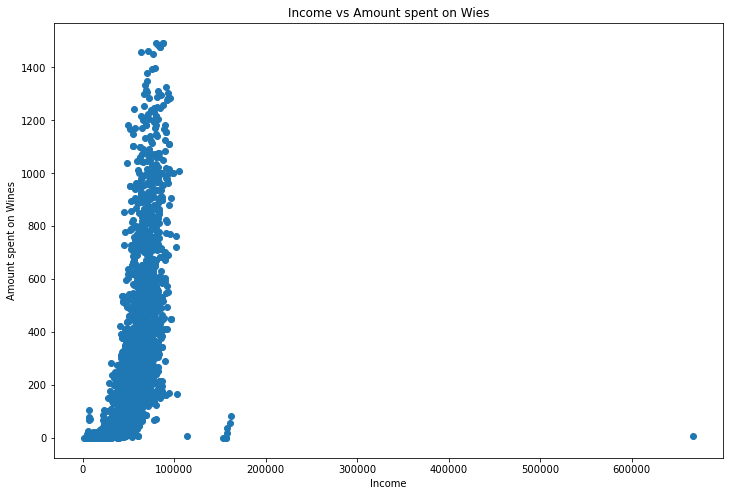

In [96]:
# Wykres zalezności Przychodów klientów od ilości wydanych pieniedzy na wina 

plt.scatter(x=df['Income'],y=df['MntWines'])

plt.title('Income vs Amount spent on Wies')

plt.xlabel('Income')

plt.ylabel('Amount spent on Wines')


plt.show()

<AxesSubplot:xlabel='Income', ylabel='MntWines'>

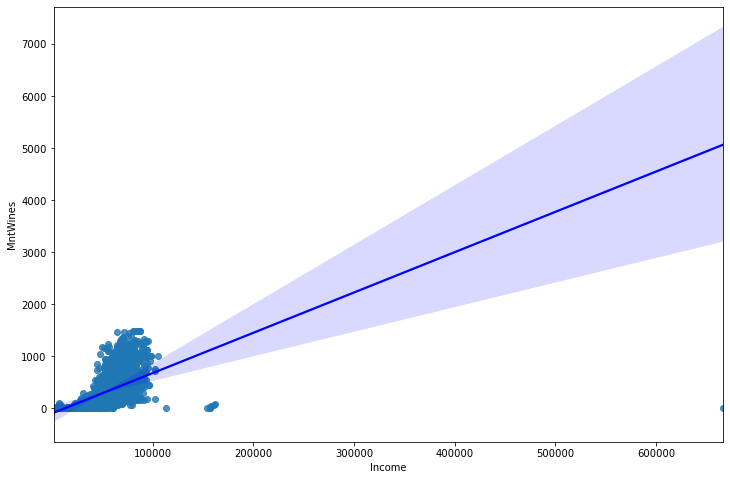

In [97]:
# Regresja dla wykresu punktowego zależności przychodów klientów od ilości pieniedzy wydanych na wino 

sns.regplot(x='Income',y='MntWines',data=df,line_kws={'color': 'blue'})

<AxesSubplot:xlabel='Income', ylabel='MntWines'>

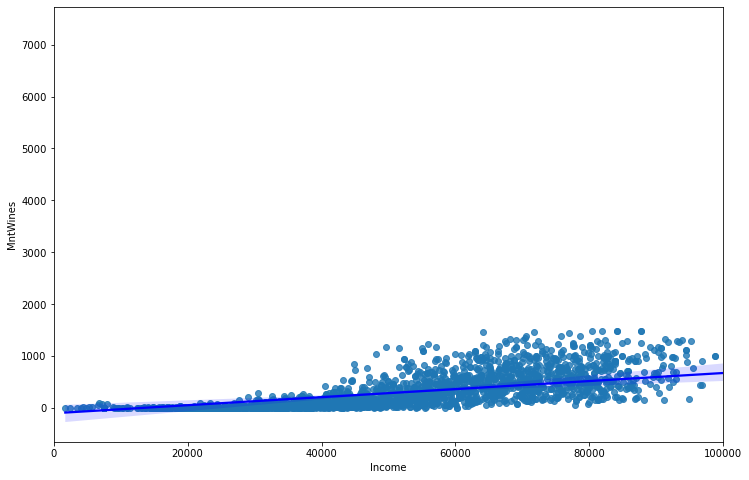

In [98]:
# zmiana parametrów wyświetlenie wykresu 

fig, ax = plt.subplots()

xlim = [0,100000]
ax.set_xlim(xlim)

sns.regplot(x='Income',y='MntWines',data=df,line_kws={'color': 'blue'})

# Funkcja regresyjna ma tendecje wzrostową - Klienci którzy mają większy przychód roczny średnio więcej wydają na wina 

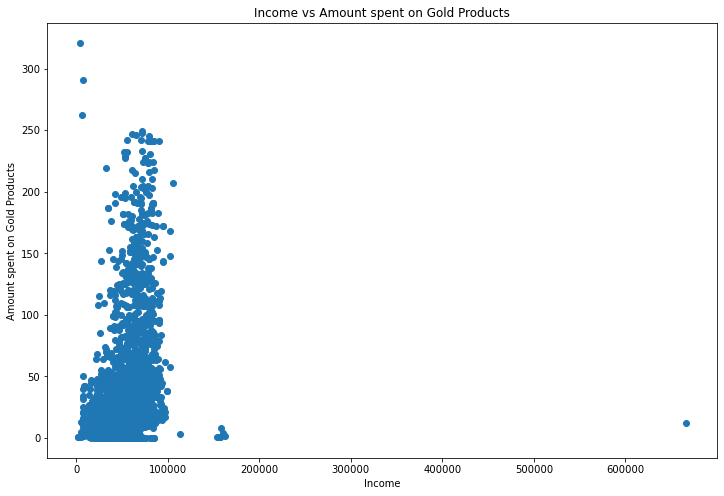

In [99]:
# Wykres zalezności Przychodów klientów od ilości wydanych pieniedzy na towary ze złota

plt.scatter(x=df['Income'],y=df['MntGoldProds'])

plt.title('Income vs Amount spent on Gold Products')

plt.xlabel('Income')

plt.ylabel('Amount spent on Gold Products')


plt.show()

<AxesSubplot:xlabel='Income', ylabel='MntGoldProds'>

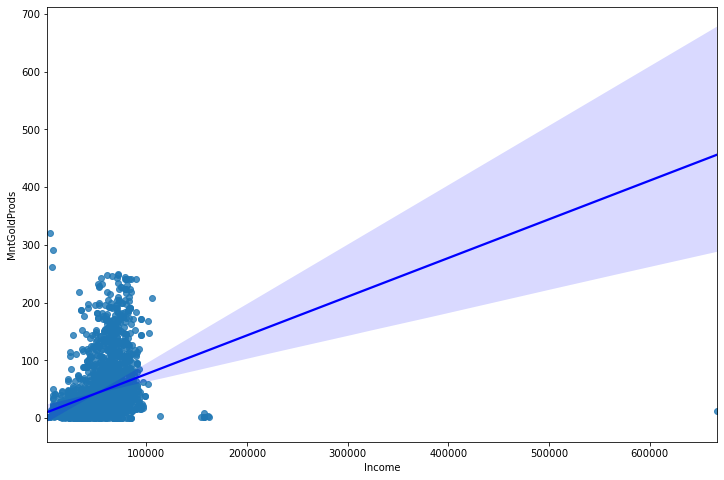

In [100]:
# Regresja dla wykresu punktowego zależności przychodów od ilości pieniedzy wydanych na towary ze złota 

sns.regplot(x='Income',y='MntGoldProds',data=df,line_kws={'color': 'blue'})
# Funkcja regresyjna ma tendecje wzrostową - Klienci którzy mają większy przychód roczny średnio więcej wydają na towary ze złota

In [39]:
# korelacja kolumn, których dane sa typu float lub int

df.corr(method='pearson')
# moją uwagę przykuła zależność MntSWeetProducts - KidHome

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumWebVisitsMonth,Complain
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.018924,-0.007446,0.033883
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.145040,0.121139,-0.030128
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,0.387878,-0.553088,-0.027225
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,-0.361647,0.447846,0.040207
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.155500,0.134884,0.003138
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.010726,-0.021445,0.013231
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.542265,-0.320653,-0.039007
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,0.296735,-0.418383,-0.005166
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,0.293761,-0.539470,-0.023483
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,0.293681,-0.446003,-0.020953


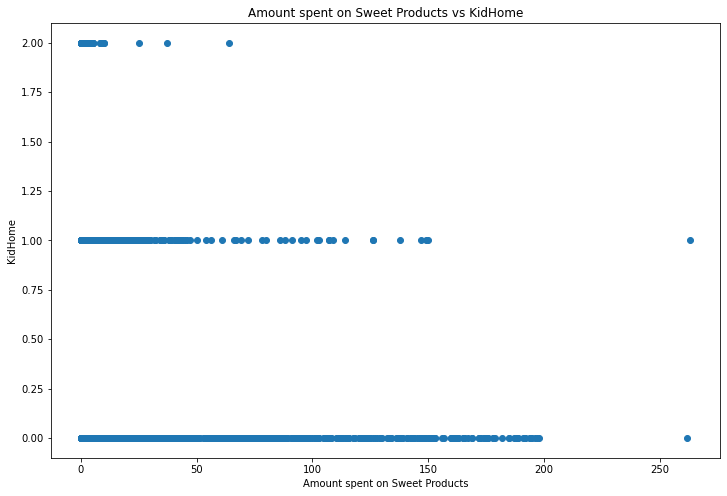

In [73]:
# Wykres zalezności ilości wydanych pieniedzy na słodycze od ilości dzieci w domach klientów

plt.scatter(x=df['MntSweetProducts'],y=df['Kidhome'])

plt.title('Amount spent on Sweet Products vs KidHome')

plt.xlabel('Amount spent on Sweet Products')

plt.ylabel('KidHome')


plt.show()

<AxesSubplot:xlabel='MntSweetProducts', ylabel='Kidhome'>

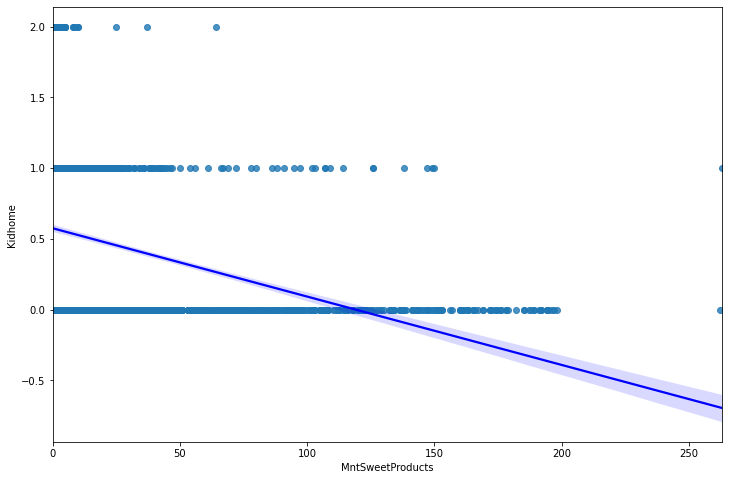

In [69]:
# Regresja dla wykresu punktowego zalezności ilości wydanych pieniedzy na słodycze od ilości dzieci w domach klientów

sns.regplot(x='MntSweetProducts',y='Kidhome',data=df,line_kws={'color': 'blue'})
# Funkcja regresyjna ma tendecje spadkowa - Klienci którzy więcej wydają pieniedzy na słodycze maja mniej dzieci w domu

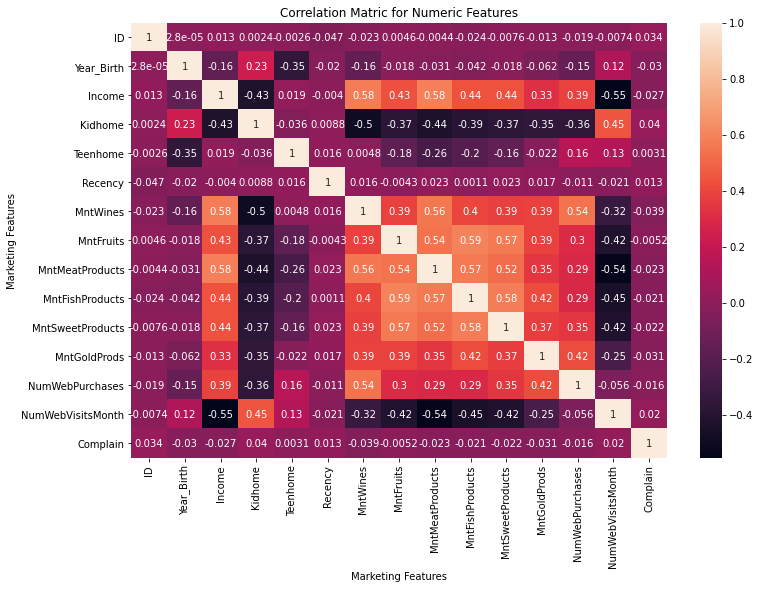

In [74]:
# korelacja kolumn, których dane sa typu float lub int w postaci heatmap

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Marketing Features')

plt.ylabel('Marketing Features')

plt.show()
# Na poniższym wykrsie widac że najwyższy współczynnik korelacji ma MntFishProduct - MntFruits
# Niski współcznynnik korelacji ma KidHome - NumWebPurchases

In [101]:
# Przedstawienie korelacji unstack, czyli df z nowym poziomem kolumn  

corr_mat = df.corr()

corr_pairs = corr_mat.unstack()

corr_pairs

ID                 ID                   1.000000
                   Year_Birth           0.000028
                   Income               0.013095
                   Kidhome              0.002406
                   Teenhome            -0.002580
                   Recency             -0.046524
                   MntWines            -0.022878
                   MntFruits            0.004600
                   MntMeatProducts     -0.004437
                   MntFishProducts     -0.024475
                   MntSweetProducts    -0.007642
                   MntGoldProds        -0.013438
                   NumWebPurchases     -0.018924
                   NumWebVisitsMonth   -0.007446
                   Complain             0.033883
Year_Birth         ID                   0.000028
                   Year_Birth           1.000000
                   Income              -0.161791
                   Kidhome              0.230176
                   Teenhome            -0.352111
                   R

In [102]:
# posortowanie korelacji unstack 

sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs

ID                 ID                   1.000000
Year_Birth         Year_Birth           1.000000
NumWebVisitsMonth  NumWebVisitsMonth    1.000000
NumWebPurchases    NumWebPurchases      1.000000
MntGoldProds       MntGoldProds         1.000000
MntSweetProducts   MntSweetProducts     1.000000
MntFishProducts    MntFishProducts      1.000000
MntMeatProducts    MntMeatProducts      1.000000
MntWines           MntWines             1.000000
Recency            Recency              1.000000
Teenhome           Teenhome             1.000000
Kidhome            Kidhome              1.000000
Income             Income               1.000000
MntFruits          MntFruits            1.000000
Complain           Complain             1.000000
MntFruits          MntFishProducts      0.594804
MntFishProducts    MntFruits            0.594804
MntMeatProducts    Income               0.584633
Income             MntMeatProducts      0.584633
MntFishProducts    MntSweetProducts     0.579870
MntSweetProducts   M

In [170]:
# Opis statystyczny analizowanej Bazy danych

df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumWebVisitsMonth,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,4.085289,5.319043,0.009477
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,2.740951,2.425359,0.096907
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,2.000000,3.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,4.000000,6.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,6.000000,7.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,27.000000,20.000000,1.000000


In [282]:
# Wyznaczenie funkcji agregującej ( średnia), pogrupowanie według stopnia Edukacji

df_gb=df.groupby('Education').mean()
df_gb[["Income","Kidhome","NumWebPurchases","NumWebVisitsMonth","Complain"]]
# Niepotrzebny podział na Master i 2n Cycle, 2nCycle powinien równać sie Master

,Income,Kidhome,NumWebPurchases,NumWebVisitsMonth,Complain
Education,,,,,
2n Cycle,47633.190000,0.477833,3.729064,5.453202,0.019704
Basic,20306.259259,0.629630,1.888889,6.870370,0.000000
Graduation,52720.373656,0.444543,4.125111,5.287489,0.012422
Master,52917.534247,0.454054,4.032432,5.178378,0.005405
PhD,56145.313929,0.401235,4.423868,5.259259,0.002058


In [86]:
# Zdefiniowanie funkcji do zmiany w kolumnie 'Education' pól o wartości "2n Cycle" na wartość "Master"

def change_education(Education):

    if Education == '2n Cycle':
        return 'Master'
    else:
        return Education

In [87]:
# Zładowanie zmian do analizowanej bazy danych

df['Education']=df['Education'].apply(change_education)

In [288]:
# Ponowne wyznaczenie funkcji agregującej ( średnia), pogrupowanie według stopnia Edukacji

df_gb=df.groupby('Education').mean()
df_gb[["Income","Kidhome","NumWebPurchases","NumWebVisitsMonth","Complain"]]

,Income,Kidhome,NumWebPurchases,NumWebVisitsMonth,Complain
Education,,,,,
Basic,20306.259259,0.629630,1.888889,6.870370,0.000000
Graduation,52720.373656,0.444543,4.125111,5.287489,0.012422
Master,51046.969912,0.462478,3.924956,5.275742,0.010471
PhD,56145.313929,0.401235,4.423868,5.259259,0.002058


In [289]:
# Wyznaczenie funkcji agregującej ( obliczenie ilości), pogrupowanie według stopnia Edukacji

df_gb=df.groupby('Education').count()
df_gb["NumWebPurchases"]

Education
Basic           54
Graduation    1127
Master         573
PhD            486
Name: NumWebPurchases, dtype: int64

C:\Users\marci\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


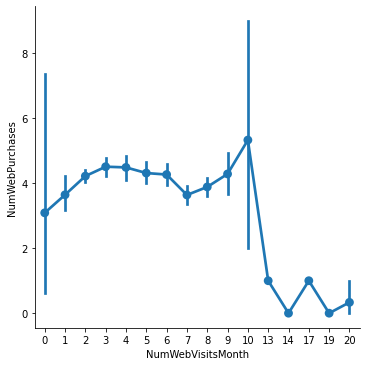

In [93]:
#zależność średnich miesięcznych wizyt na stronie internetowej sklepu od uzyskanych średnich ilości zakupów przez internet

sns.factorplot(x='NumWebVisitsMonth',y='NumWebPurchases',data=df)



C:\Users\marci\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


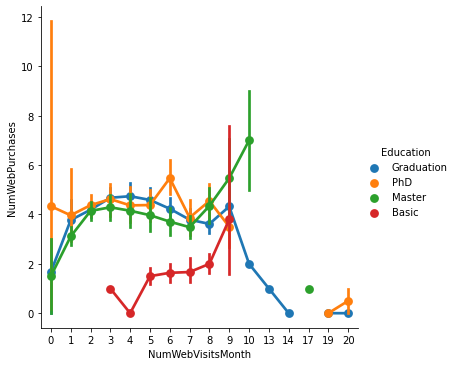

In [88]:
# Categorical plot, 4 Wykresy (kolory wskazują na stopien edukacji) pokazujące zależność średnich miesięcznych wizyt na stronie internetowej sklepu od uzyskanych średnich ilości zakupów przez internet

sns.factorplot(x='NumWebVisitsMonth',y='NumWebPurchases',hue='Education',data=df)

(array([28., 24., 28., 29., 27., 15., 21., 12., 25., 24., 26., 26., 24.,
        27., 19., 16., 21., 20., 19., 25., 21., 21., 13., 28., 28., 25.,
        21., 27., 23., 29., 32., 18., 21., 17., 23., 17., 18., 24., 25.,
        19., 25., 15., 20., 20., 11., 17., 31., 19., 28., 30., 22., 28.,
        22., 20., 32., 20., 37., 24., 15., 14., 22., 21., 19., 23., 23.,
        30., 16., 18., 25., 16., 18., 29., 27., 20., 26., 17., 19., 25.,
        26., 17., 28., 27., 22., 22., 23., 18., 26., 27., 16., 20., 20.,
        18., 30., 21., 26., 19., 25., 20., 22., 17.]),
 array([ 0.  ,  0.99,  1.98,  2.97,  3.96,  4.95,  5.94,  6.93,  7.92,
         8.91,  9.9 , 10.89, 11.88, 12.87, 13.86, 14.85, 15.84, 16.83,
        17.82, 18.81, 19.8 , 20.79, 21.78, 22.77, 23.76, 24.75, 25.74,
        26.73, 27.72, 28.71, 29.7 , 30.69, 31.68, 32.67, 33.66, 34.65,
        35.64, 36.63, 37.62, 38.61, 39.6 , 40.59, 41.58, 42.57, 43.56,
        44.55, 45.54, 46.53, 47.52, 48.51, 49.5 , 50.49, 51.48, 52.47,
        

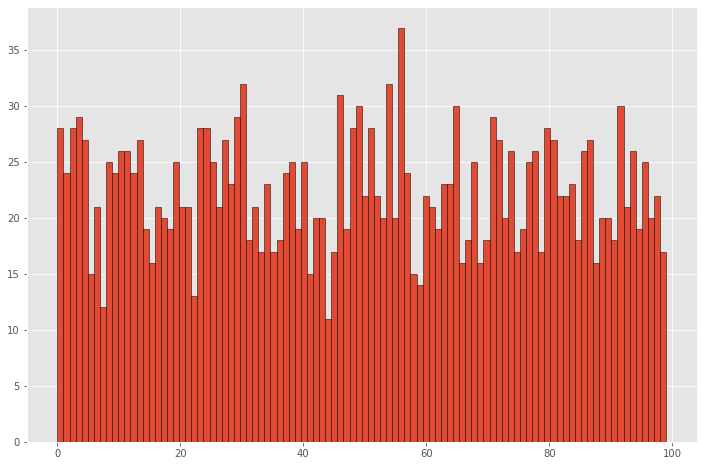

In [292]:
# Histogram kolumny'Recency' (Recency - ilość dni od ostatniego zakupu)

plt.hist(df['Recency'],bins=100,ec='black')

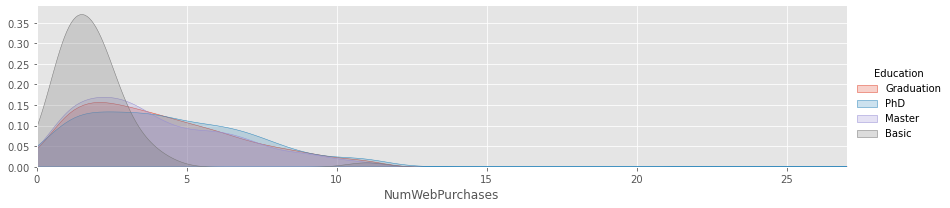

In [307]:
# Wykres gęstości występowania ilości wykonanych zakupow przez internet (NumWebPurchases), w zależności od stopnia edukacji klientów (Education)                                                 

fig = sns.FacetGrid(df,hue='Education',aspect=4)

fig.map(sns.kdeplot,'NumWebPurchases',shade=True)
               
biggest = df['NumWebPurchases'].max()

fig.set(xlim=(0,biggest))

fig.add_legend()

In [ ]:
# Najważniejsze wnioski:
# Największy przychod dla sklepu przynoszą wina, na drugim miejscu produkty mięsne
# Klienci, którzy mają większy przychód roczny średnio więcej wydaja pieniędzy na produkty oferowane przez sklep
# Najwyższy współczynnik korelacji ma MntFishProduct - MntFruits,niski współcznynnik korelacji ma KidHome - NumWebPurchases 
# Największa liczba klientów korzystających ze sklepu ma dyplom ukończenia wyższych studiów
# Zwiększona ilość wejść na strone internetową sklepu przez klientów nie podnosi znacznie liczby wykonanych zakupów przez internet